In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [4]:
train

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
42494,This is better than the early Cronenberg horro...,1
42495,"Apparently, this is what happens when a direct...",0
42496,The first time I saw this film it was with thi...,1
42497,One of the great classic comedies. Not a slaps...,1


In [5]:
test

,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
...,...,...
5093,dont ever ever ever consider watching this sor...,0
5094,"For the first time in years, I've felt the nee...",0
5095,i've heard a lot about the inventive camera-wo...,0
5096,I am very tolerant of really bad sci/fi and ho...,0


In [6]:
train.isna().sum()

text     0
label    0
dtype: int64

In [7]:
test.isna().sum()

text     0
label    0
dtype: int64

In [8]:
data = pd.concat([train,test], axis=0)

In [10]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [14]:
data.label.value_counts()

1    23800
0    23797
Name: label, dtype: int64

In [17]:
# max length
max(data.text.str.len())

13704

In [18]:
# min length
min(data.text.str.len())

32

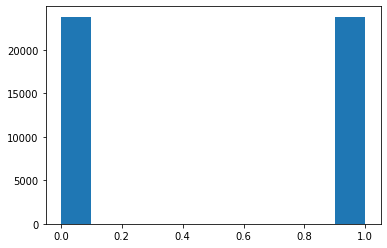

In [52]:
plt.hist(data['label'])
plt.show()

In [19]:
stemmer = PorterStemmer()

In [20]:
stemmed_data = data.text.apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [21]:
stemmed_data

0       i grew up (b. 1965) watch and love the thunder...
1       when i put thi movi in my dvd player, and sat ...
2       whi do peopl who do not know what a particular...
3       even though i have great interest in biblic mo...
4       im a die hard dad armi fan and noth will ever ...
                              ...                        
5093    dont ever ever ever consid watch thi sorri exc...
5094    for the first time in years, i'v felt the need...
5095    i'v heard a lot about the invent camera-work a...
5096    i am veri toler of realli bad sci/fi and horro...
5097    "a young woman suffer from the delus that she ...
Name: text, Length: 47597, dtype: object

In [24]:
tfidf = TfidfVectorizer(stop_words='english')

In [25]:
nb = MultinomialNB()
lr = LogisticRegression()

In [26]:
log_reg_model_operations = [('tfidf', tfidf), ('lr', lr)]

In [28]:
naive_bayes_model_operations = [('tfidf', tfidf), ('nb', nb)]

In [29]:
naive_bayes_pipe_model = Pipeline(naive_bayes_model_operations)

In [30]:
log_reg_pipe_model = Pipeline(log_reg_model_operations)

In [32]:
x = stemmed_data
y = data.label

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape

(38077,)

In [35]:
X_test.shape

(9520,)

In [36]:
y_train.shape

(38077,)

In [37]:
y_test.shape

(9520,)

In [38]:
log_reg_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('lr', LogisticRegression())])

In [39]:
log_reg_predictions = log_reg_pipe_model.predict(X_test)

In [54]:
confusion_matrix(log_reg_predictions, y_test)

array([[4060,  598],
       [ 698, 4164]], dtype=int64)

In [40]:
print(classification_report(log_reg_predictions, y_test))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4658
           1       0.87      0.86      0.87      4862

    accuracy                           0.86      9520
   macro avg       0.86      0.86      0.86      9520
weighted avg       0.86      0.86      0.86      9520



In [41]:
naive_bayes_pipe_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nb', MultinomialNB())])

In [42]:
naive_bayes_predictions = naive_bayes_pipe_model.predict(X_test)

In [55]:
confusion_matrix(naive_bayes_predictions, y_test)

array([[4069,  818],
       [ 689, 3944]], dtype=int64)

In [43]:
print(classification_report(naive_bayes_predictions, y_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4887
           1       0.83      0.85      0.84      4633

    accuracy                           0.84      9520
   macro avg       0.84      0.84      0.84      9520
weighted avg       0.84      0.84      0.84      9520



In [44]:
import pickle

In [45]:
pickle.dump(naive_bayes_pipe_model, open('nb_sentiment_predictor', 'wb'))

In [46]:
pickle.dump(log_reg_pipe_model, open('log_reg_sentiment_pred', 'wb'))